<a href="https://colab.research.google.com/github/Guru-yash/Project/blob/main/drone_new_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install inference-sdk supervision opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 539.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.15
    Uninstalling aiohttp-3.11.15:
      Successfully uninstalled aiohttp-3.11.15


In [2]:
from google.colab import files
uploaded = files.upload()

# Get the filename
image_path = list(uploaded.keys())[0]


Saving flat-lay-in-a-trendy-2021-new-colors-illuminating-yellow-and-ultimate-gray-color-of-the-year-2021-retro-toy-car-on-grey-background-with-copy-sapce-photo.jpg to flat-lay-in-a-trendy-2021-new-colors-illuminating-yellow-and-ultimate-gray-color-of-the-year-2021-retro-toy-car-on-grey-background-with-copy-sapce-photo.jpg


In [4]:
from inference_sdk import InferenceHTTPClient

client = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="GDdskUNZizaC5hAGgTJu"
)

result = client.run_workflow(
    workspace_name="shivam377",
    workflow_id="detect-count-and-visualize",
    images={
        "image": image_path
    },
    use_cache=True
)

import json
print(json.dumps(result, indent=2))


[
  {
    "count_objects": 1,
    "output_image": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAPUBb4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6A8VTzw3Vv/zzqn53k/6RBPXQXlnBqVr5E/8Aq6z/APhD7Hzf+P668uvpD5sz/tk83+vnkkqx4b/5DP8A2xqxr2m2MNhH5HlReV/qf+mtZem3n2PVI55/9

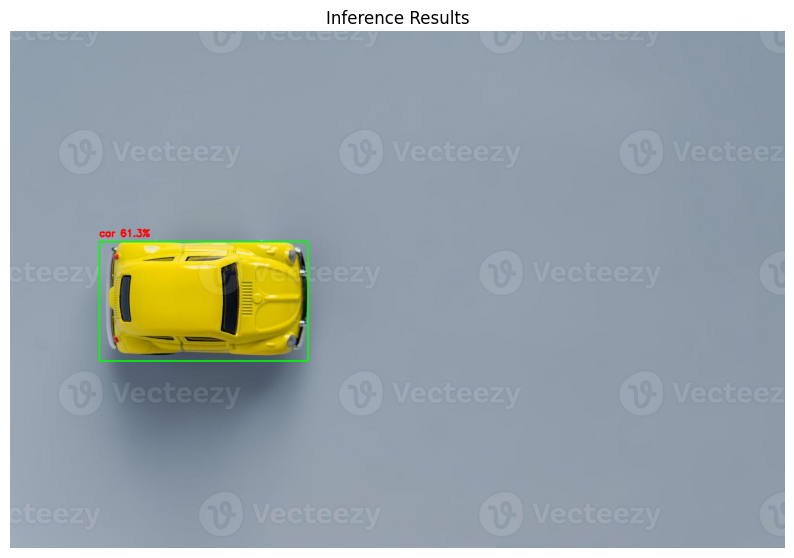

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Access predictions
predictions = result[0]["predictions"]["predictions"]

# Draw each prediction
for pred in predictions:
    x = int(pred["x"])
    y = int(pred["y"])
    w = int(pred["width"])
    h = int(pred["height"])
    class_name = pred["class"]
    confidence = round(pred["confidence"] * 100, 1)

    # Bounding box corners
    x1, y1 = x - w // 2, y - h // 2
    x2, y2 = x + w // 2, y + h // 2

    # Draw rectangle and label
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, f'{class_name} {confidence}%', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Inference Results")
plt.show()
